<a href="https://www.kaggle.com/code/alliegross/diabetes-project?scriptVersionId=146189696" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Diabetes Project
### *This project includes the EDA, Hypothesis Testing, Feature Engineering, Model Pre-Processing and Model Constuction from the Diabetes Health Indicators Dataset on Kaggle*

Diabetes is a chronic metabolic disorder characterized by elevated levels of blood glucose, resulting from insufficient production or inefficient utilization of insulin. Insulin, a hormone produced by the pancreas, facilitates the absorption of glucose into cells for energy. In individuals with diabetes, this regulatory mechanism is impaired, leading to persistent hyperglycemia. 

There are two main types of diabetes: 
- Type 1, often diagnosed in childhood, involves the immune system attacking and destroying insulin-producing cells 
- Type 2, more common in adults, is linked to lifestyle factors and insulin resistance. 

If left unmanaged, diabetes can lead to serious complications, including cardiovascular diseases, kidney dysfunction, and nerve damage. Regular monitoring, lifestyle modifications, and, in some cases, medication or insulin therapy are crucial components of diabetes management.

This project works to test 5 different machine learning algorithms to predict diabetes among 21 variables.

* See full data dictionary at https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

### Table of Contents
#### *1. Load Packages and Clean Dataset*
#### *2. Perform Exploratory Data Analysis (EDA)*
A. HighBP <br>
B. HighChol <br>
C. BMI <br>
D. GenHealth <br>
E. PhysHlth <br>
F. DiffWalk <br>

#### *3. Hypothesis Testing*
A. HighBP vs. Diabetes_binary <br>
B. HighChol vs. Diabetes_binary <br>
C. BMI vs. Diabetes_binary<br>
D. GenHealth vs. Diabetes_binary<br>
E. PhysHlth vs. Diabetes_binary<br>
F. DiffWalk vs. Diabetes_binary<br>
#### *4.) Feature Engineering*

#### *5.) Pre-Processing and Hyperparameter Tuning*

#### *6.) Model Construction*
A. K Nearest Neighbors <br>
B. Decision Tree <br>
C. Random Forests<br>
D. Logistic Regression<br>
E. XGBoost<br>


## 1.) Load Packages and Prepare Dataset

In [498]:
# Load Packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, classification_report

from xgboost import plot_importance
import pickle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [568]:
# Load dataset
df = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

# Confirm the dataset is loaded into the dataframe
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [444]:
# Obtain summary information, check for null values and data types that may need to be changed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [445]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [446]:
# Get descriptive statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [447]:
# Identify, isolate, and drop rows with duplicates based on any appropriate variable or all together
df.duplicated().sum()

24206

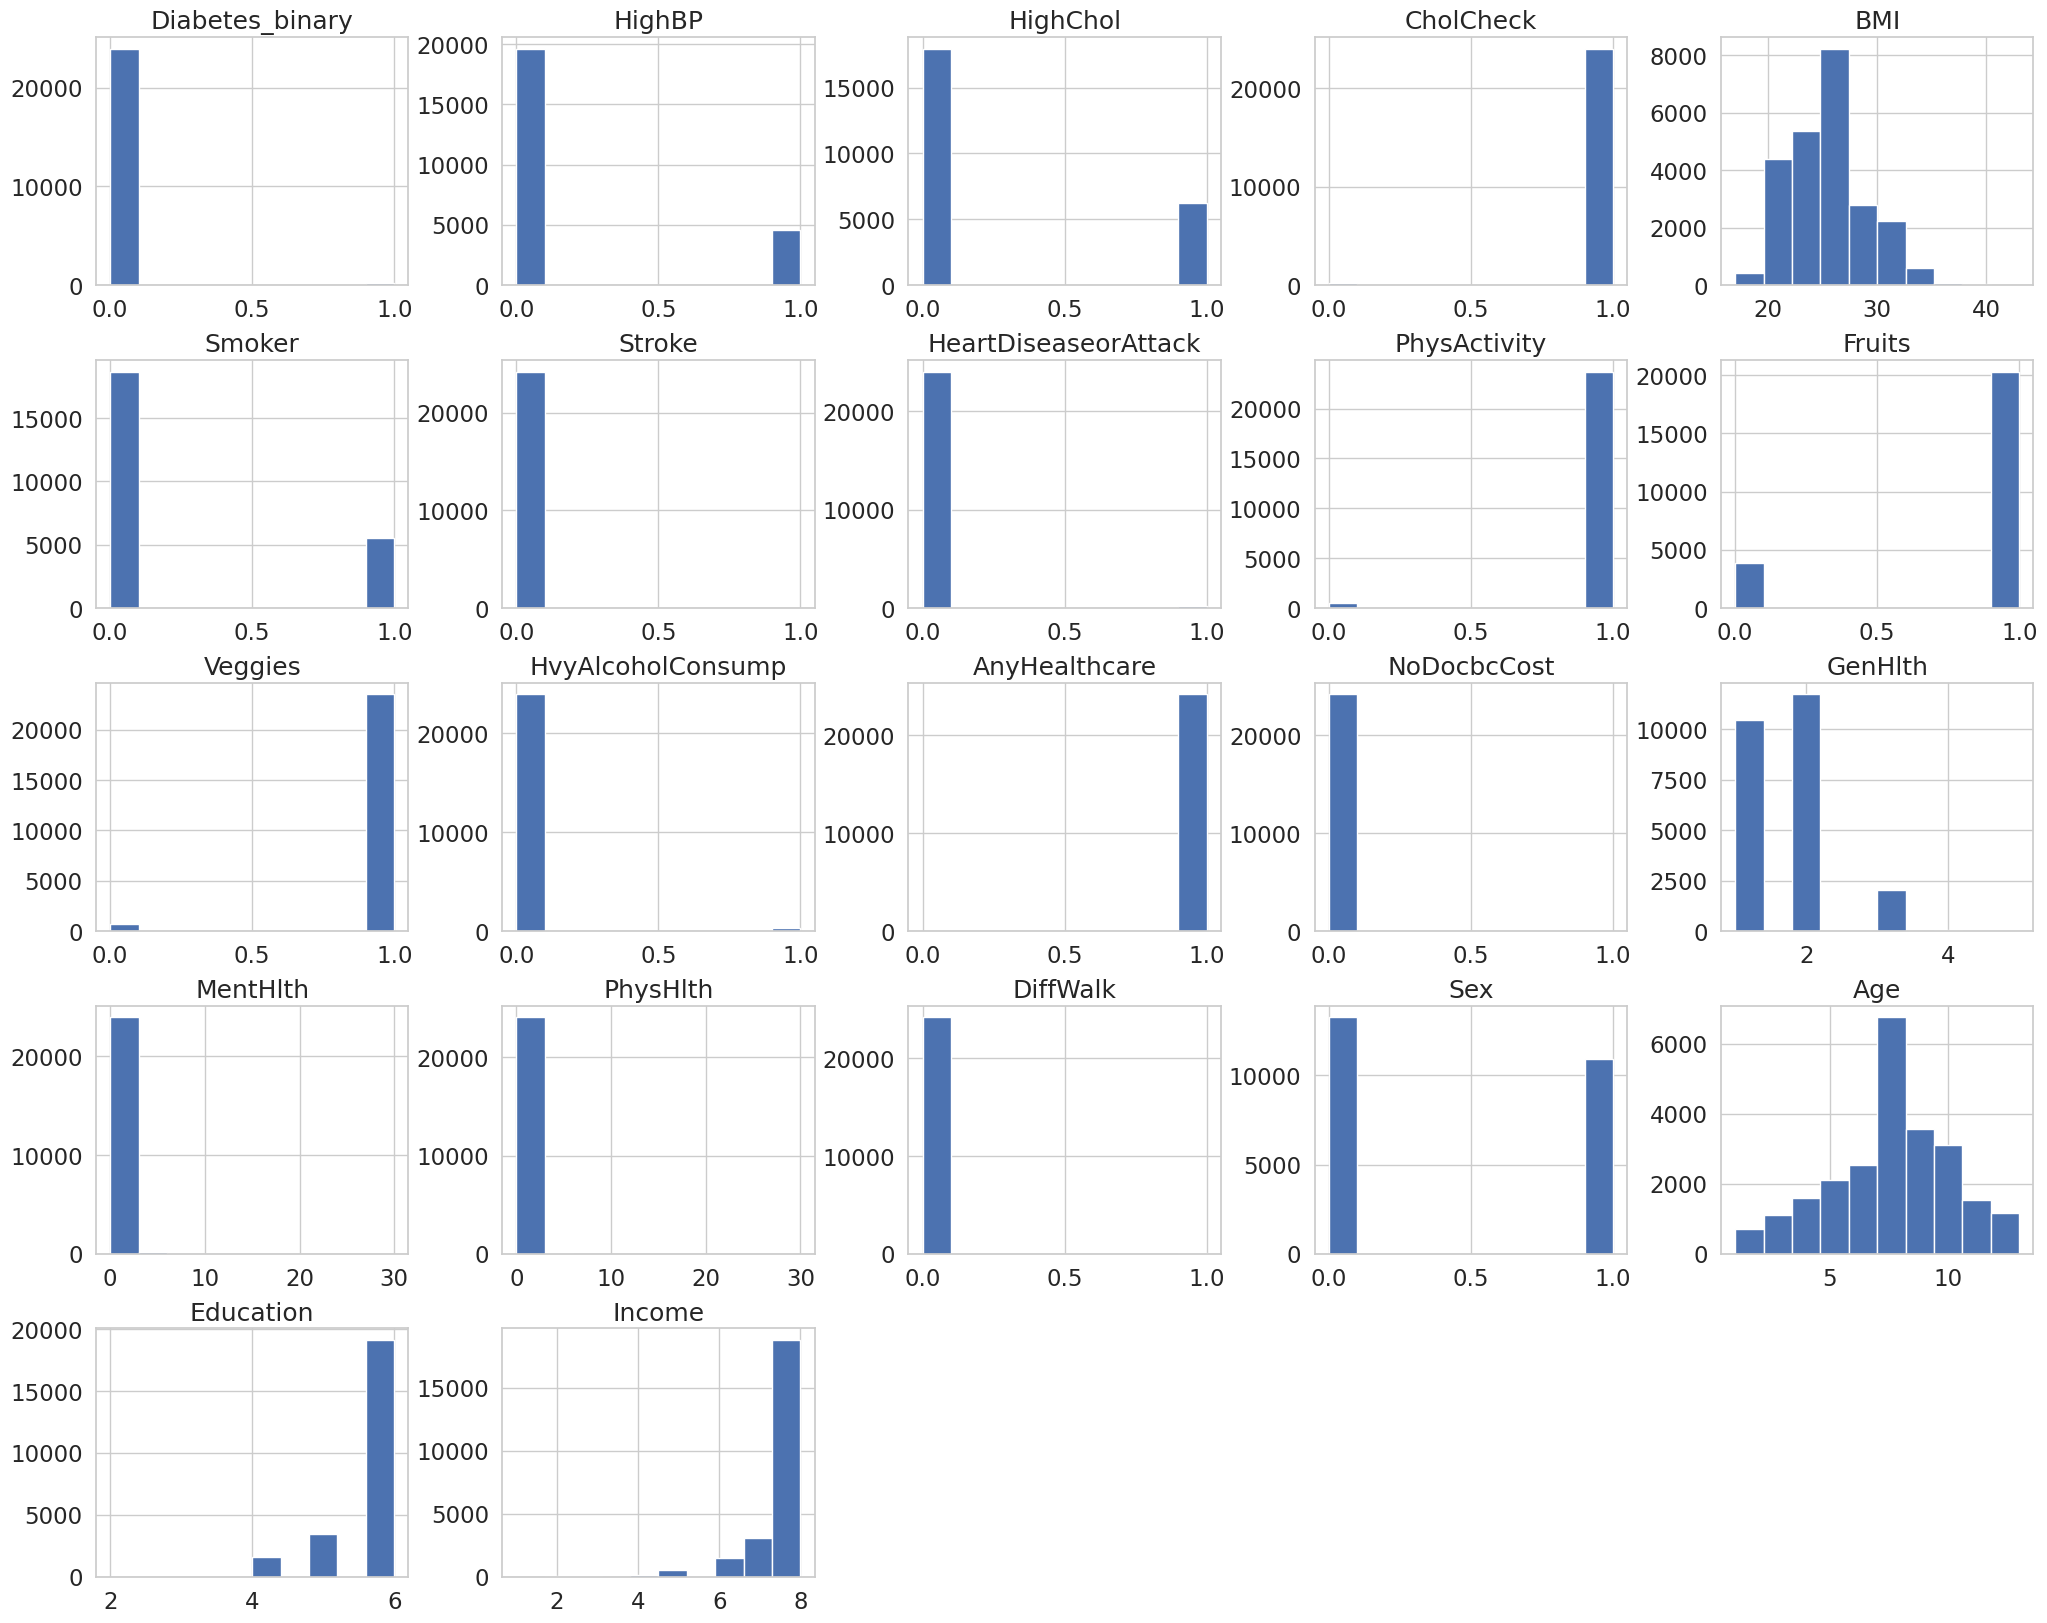

In [448]:
# View the disribution of duplicates to see if the duplication is accidental or normal
duplicate_rows = df[df.duplicated()]

duplicate_rows.hist(figsize=(25,20));

In [449]:
value_counts = duplicate_rows[duplicate_rows['Diabetes_binary'] == 1.0]['Diabetes_binary'].value_counts()
print(value_counts)

Diabetes_binary
1.0    249
Name: count, dtype: int64


In [450]:
value_counts = duplicate_rows[duplicate_rows['CholCheck'] == 0.0]['Diabetes_binary'].value_counts()
print(value_counts)

Diabetes_binary
0.0    172
Name: count, dtype: int64


### Data Cleaning Plan:
1.) Dummy encode variables: no
* The data is already dummy encoded for yes/no binary variables

2.) Replace categorical variables: no
* There are no categorical variables to replace

3.) Change time data format: no
* There is no time data to covert to date/time formatting

4.) Change other data types: yes
* Change all floats to ints for computational speed

5.) Remove null values: no
* There appears to be no null values in the dataset.

6.) Remove or restructure outliers: no
* Since most variables are categorical or yes/no, the dataset is formatted to prevent outliers. This should be kept in mind when picking models

7.) Remove duplicates: no
* I chose not to remove the duplicates because these duplicates could show patterns in the data and distribution. It does not appear that the cause of duplication is an error. If removed, the accuracy of the models could decrease

### Other Notes
* It may be beneficial to change these variable names to keep the capitalization pattern consistent: NoDocbcCost, HeartDiseaseorAttack
* If it were up to me, I would have liked to see data on whether diabetes runs in the family of the patient and sugar intake throughout lifetime

In [451]:
# Change all floats to ints
df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [452]:
# Confirm all data types have been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

***

***

# 2. Perform EDA

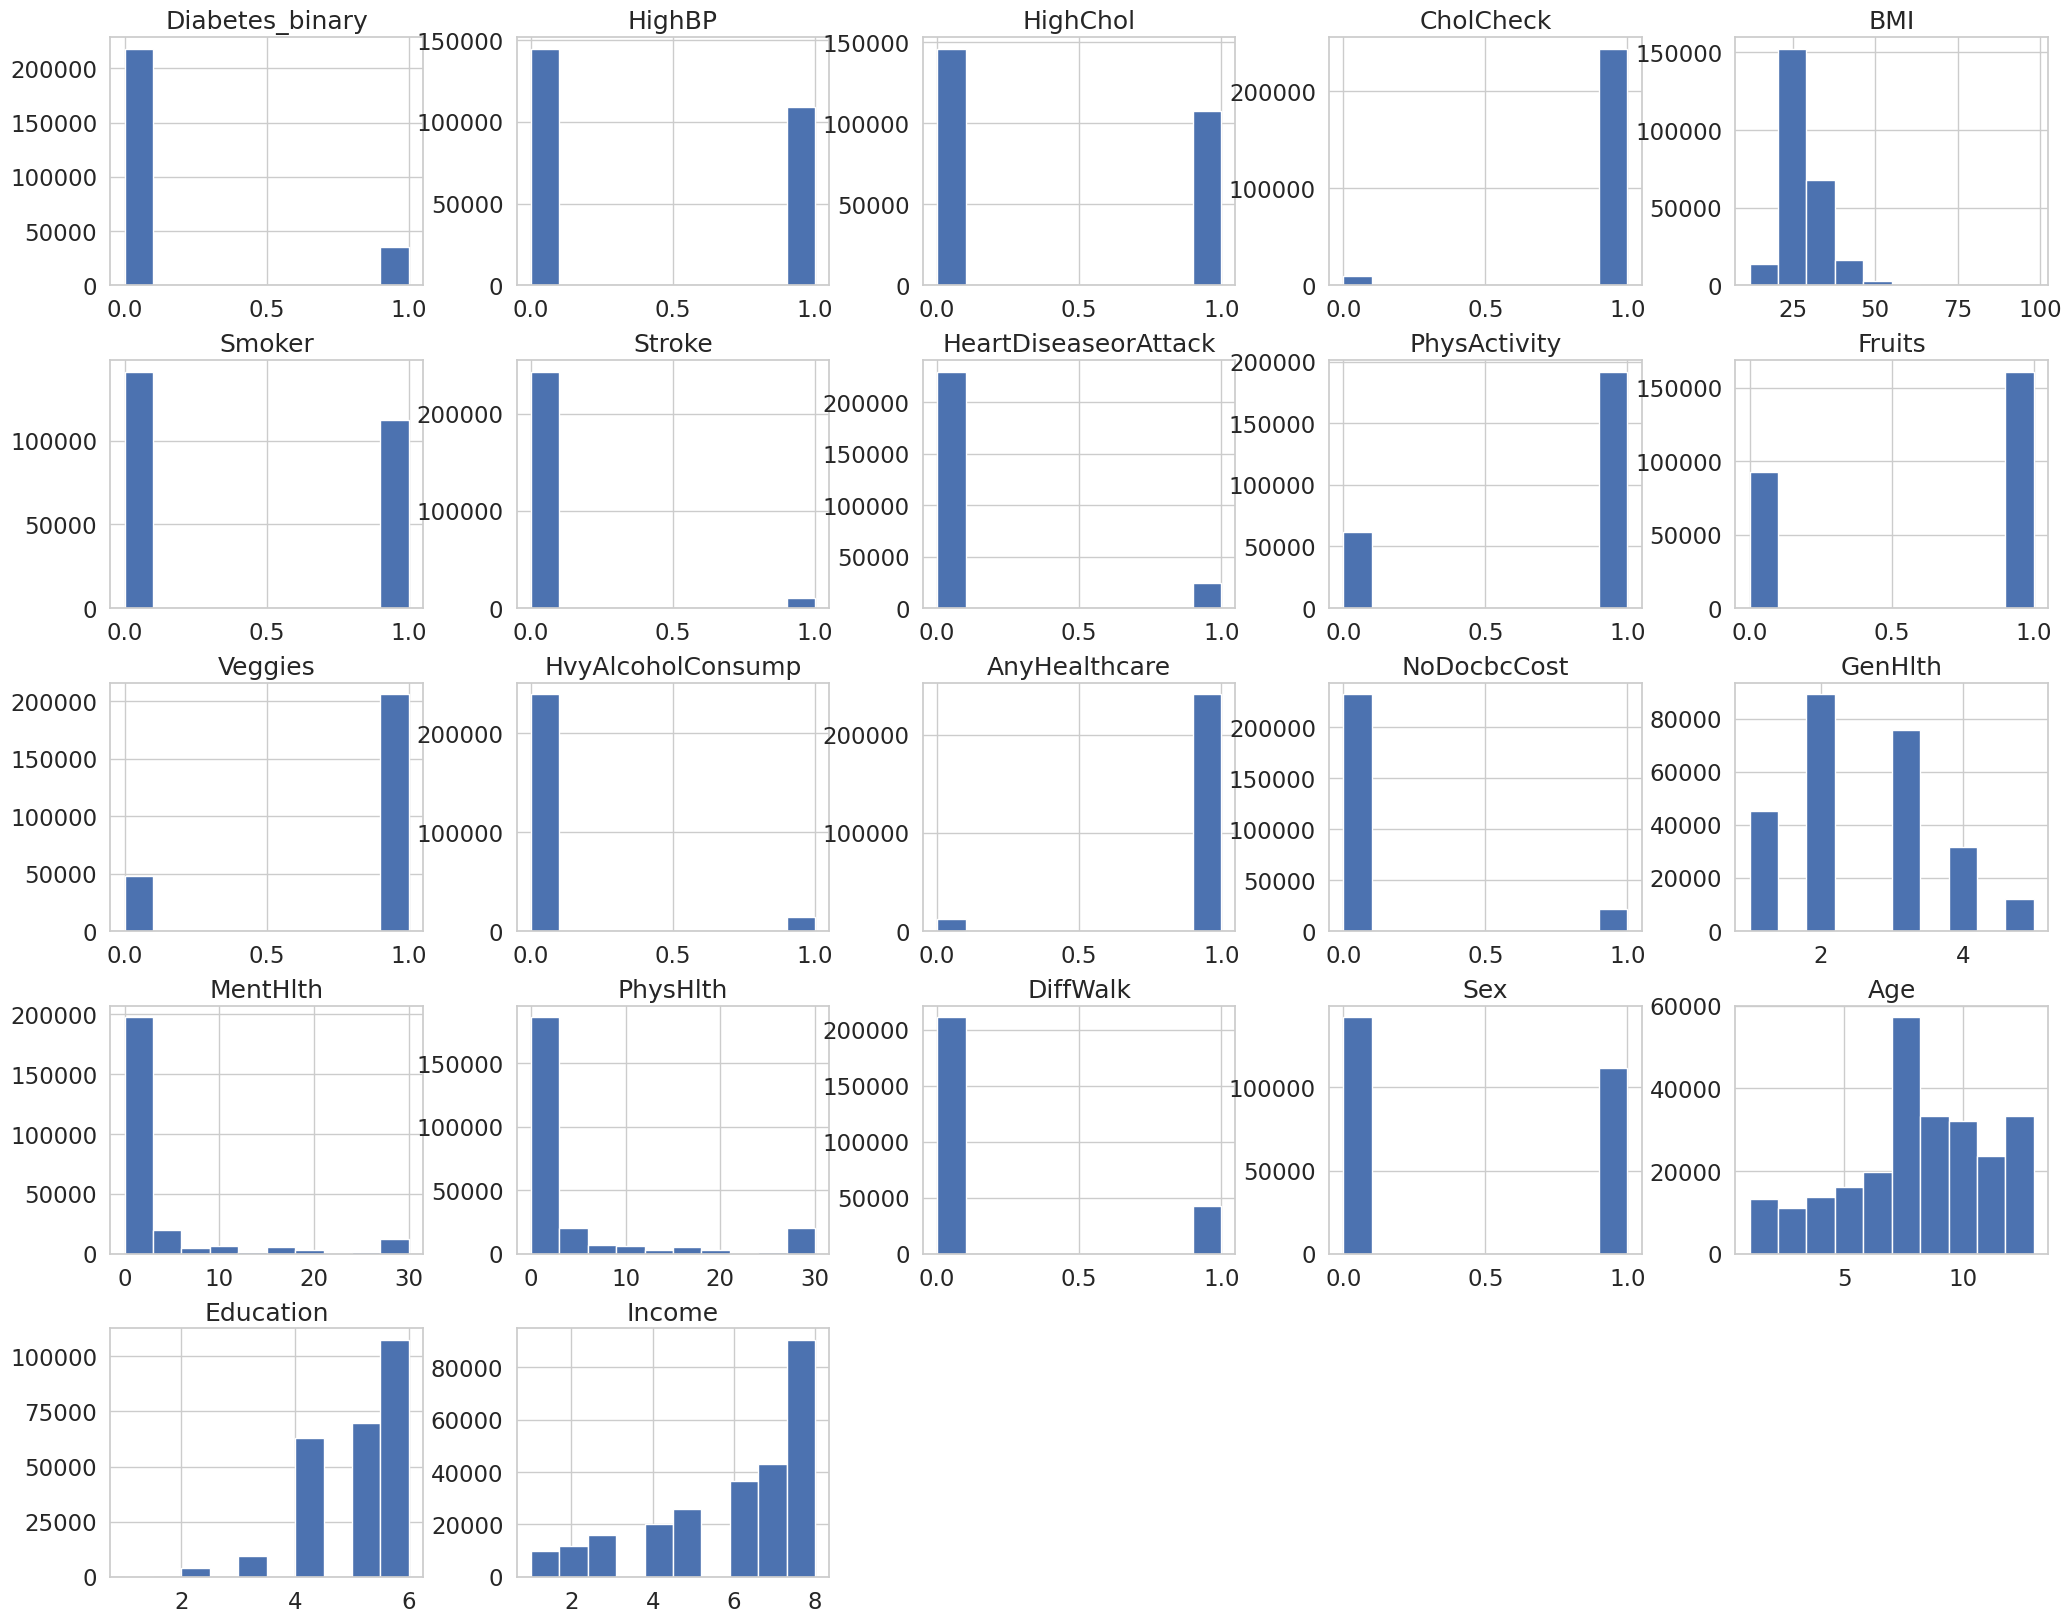

In [453]:
# Visual representation of value counts
df.hist(figsize=(25,20));

Text(0.5, 1.0, 'Diabetes Variable Correlations')

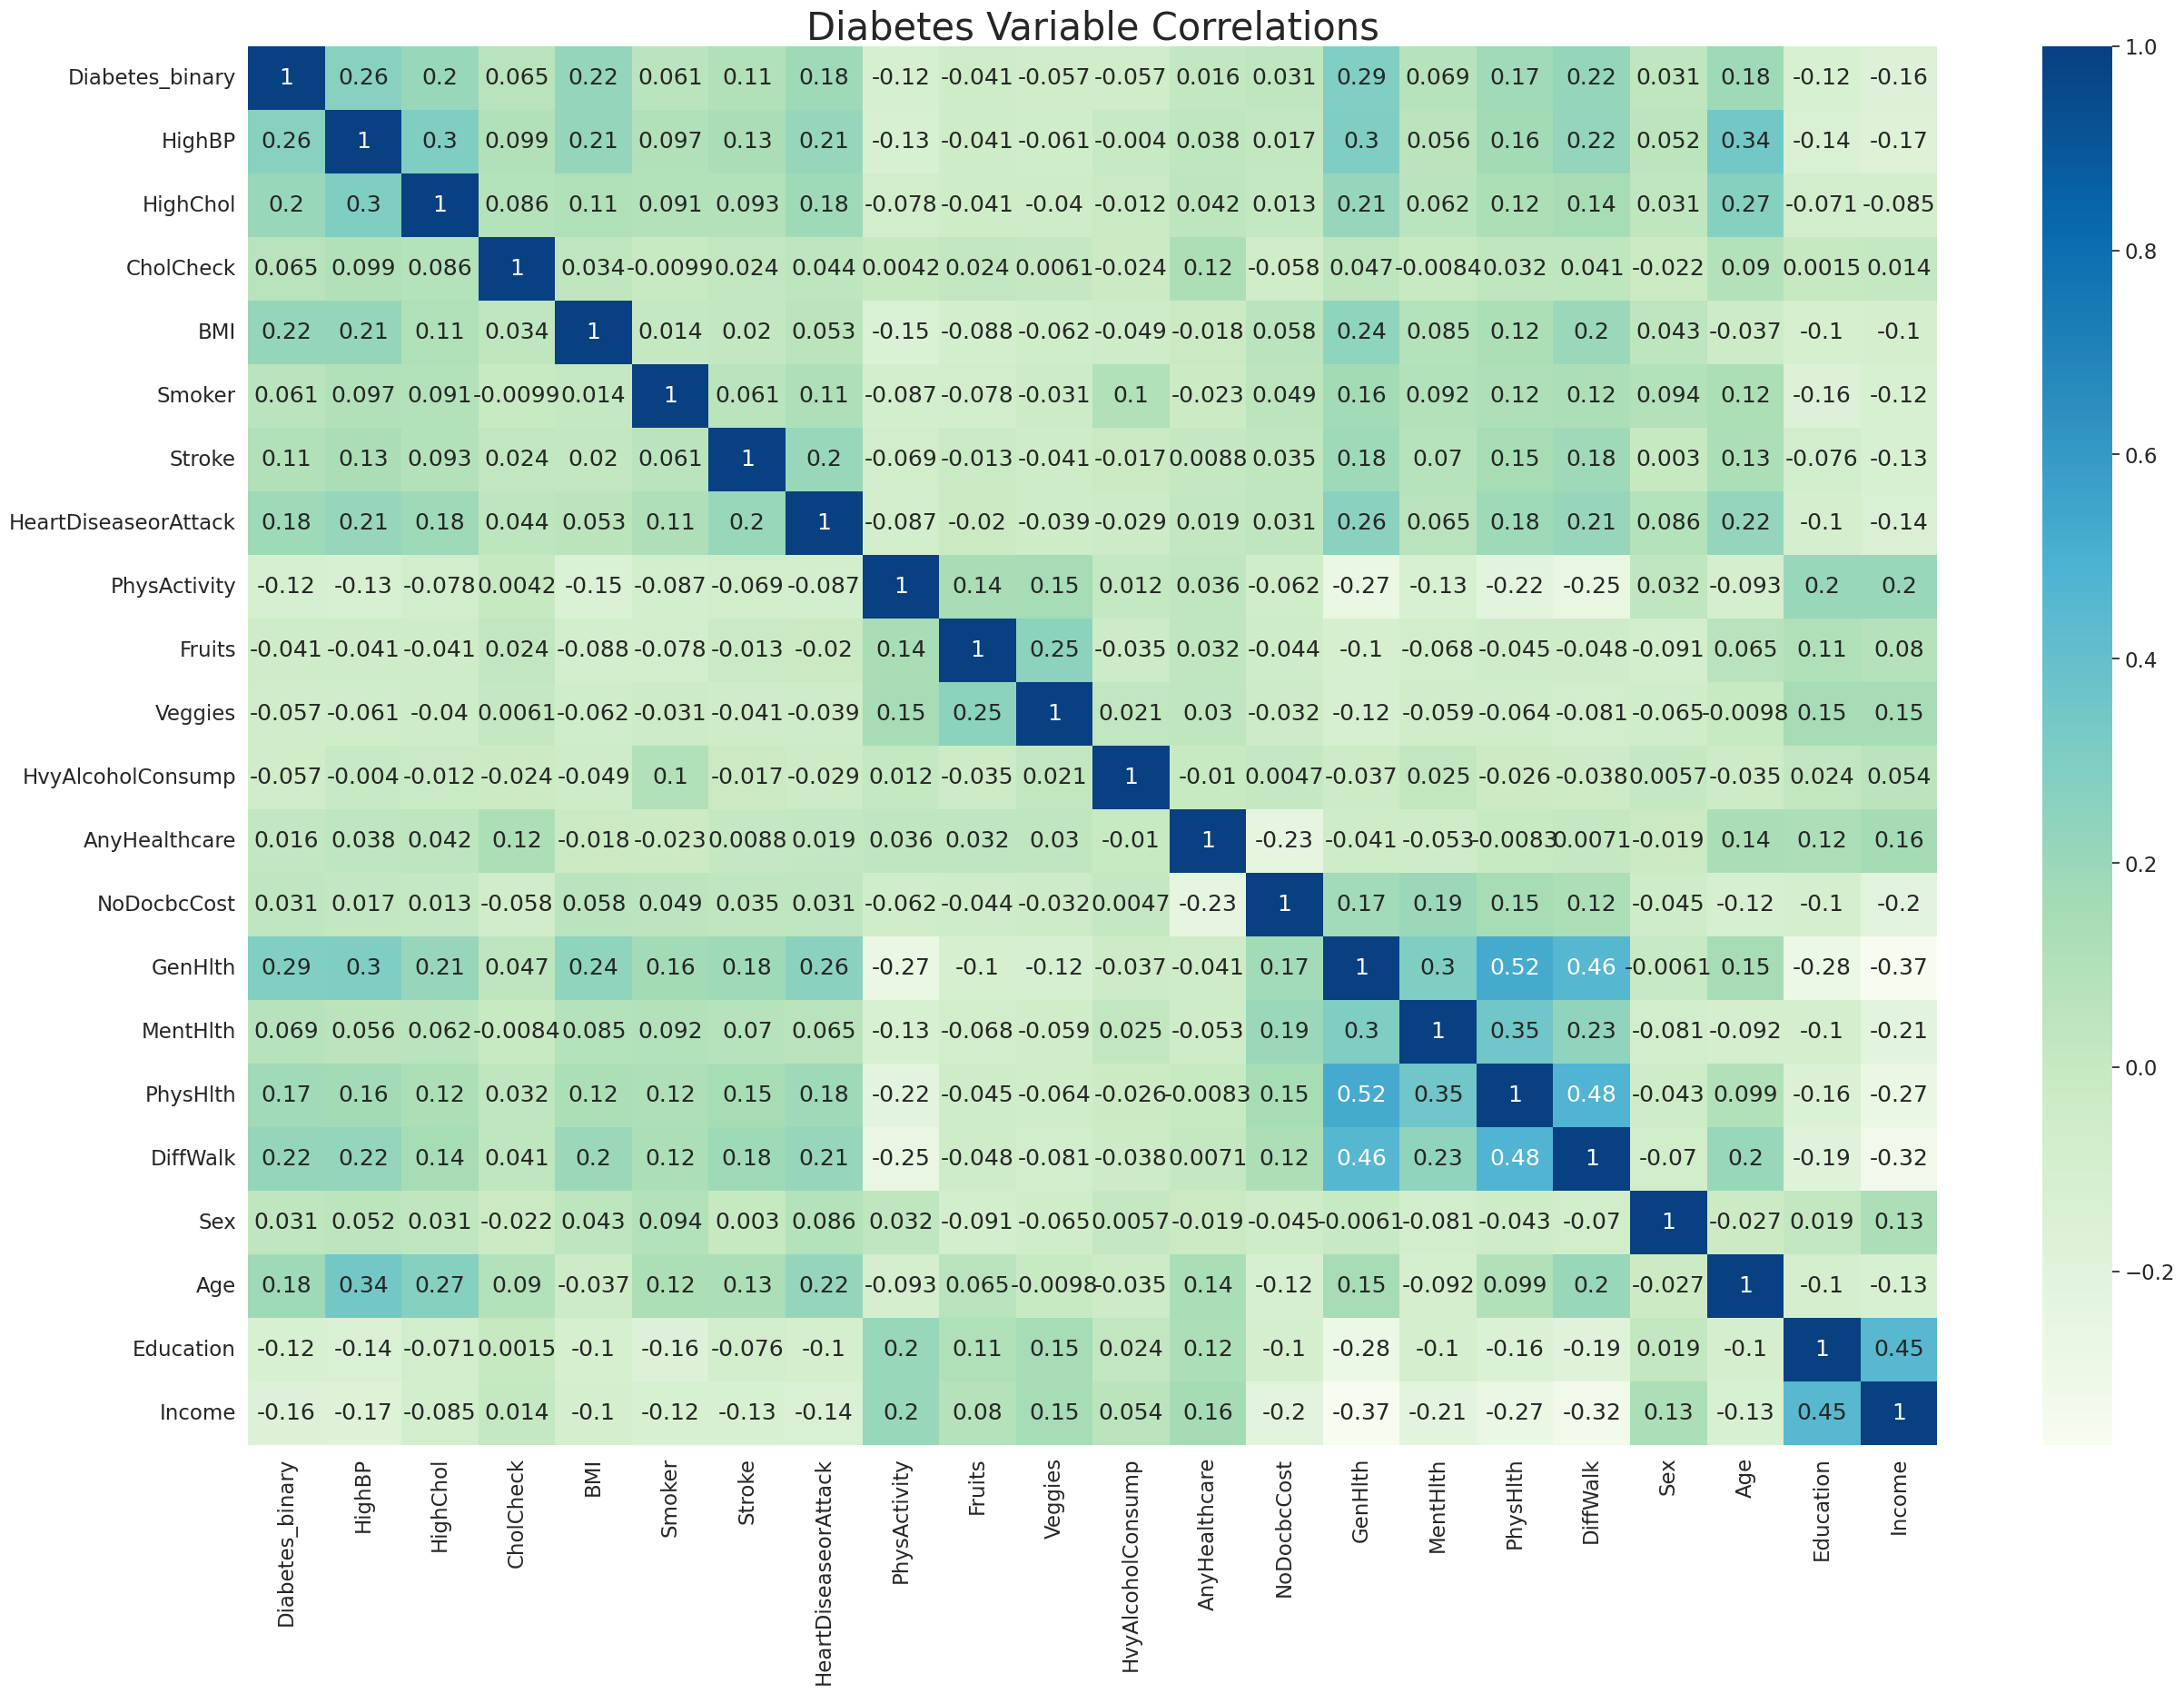

In [454]:
# Check correlation using a heatmap
plt.figure(figsize = (30,20))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),annot=True, cmap='GnBu')
plt.title("Diabetes Variable Correlations",fontsize=30)

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

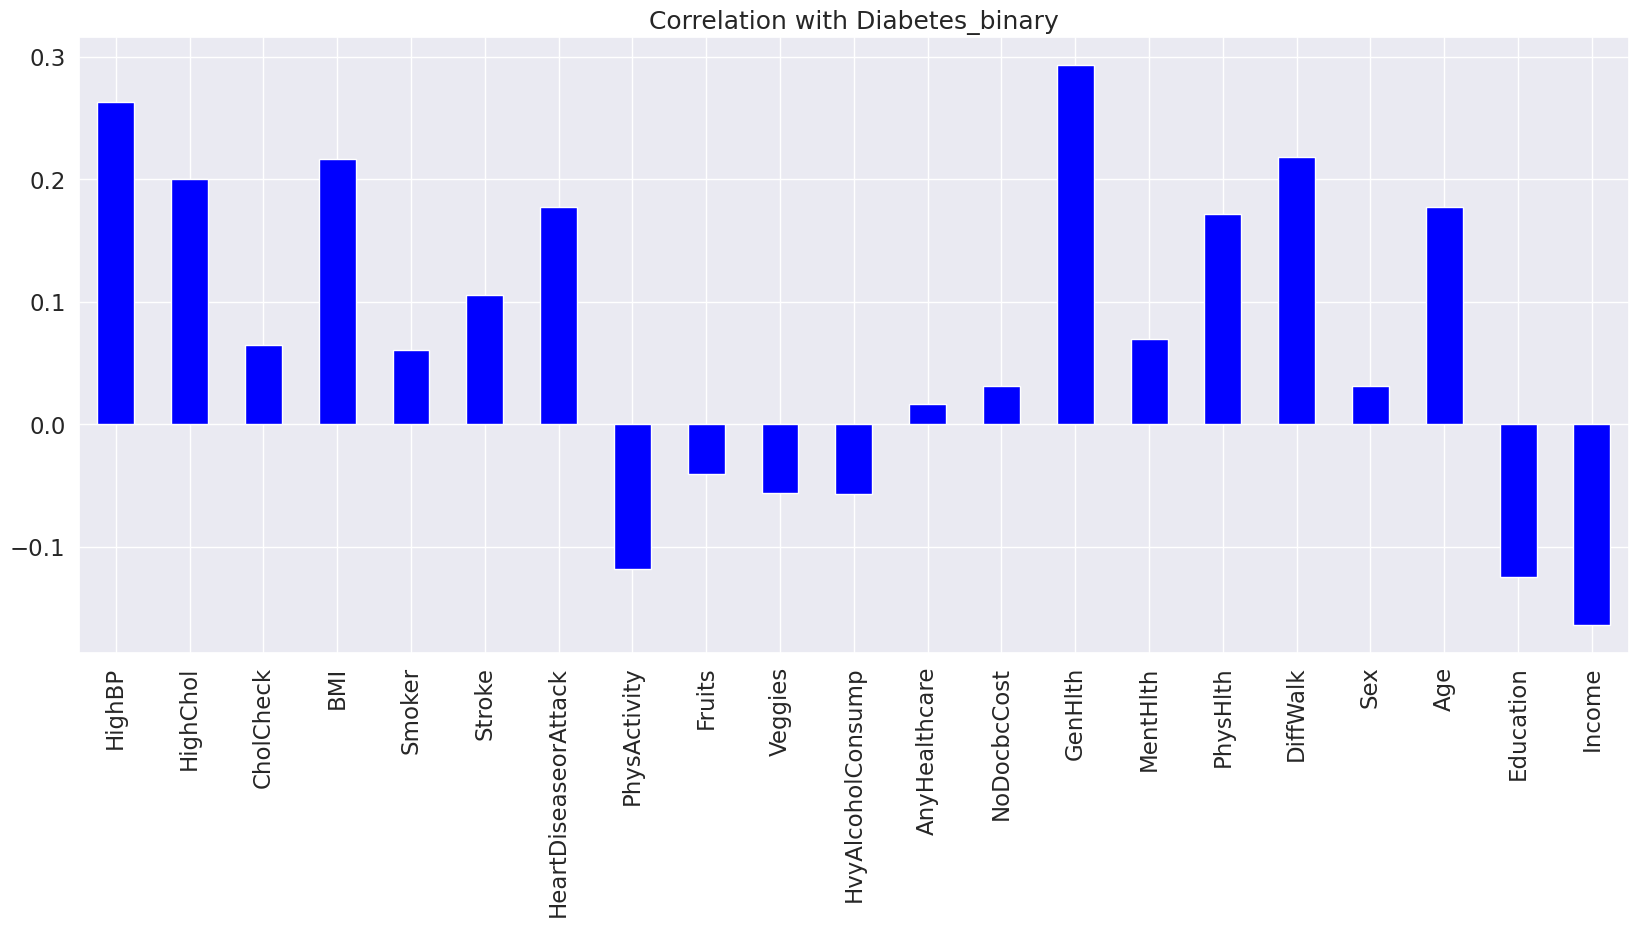

In [455]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="Blue")

Noteable Correlations:
* Lowest: fruits, veggies, anyhealthcare, nodocbccost, sex(important!)
* Highest: highBP, highchol, highBMI, genhealth, physhealth, diffwalk

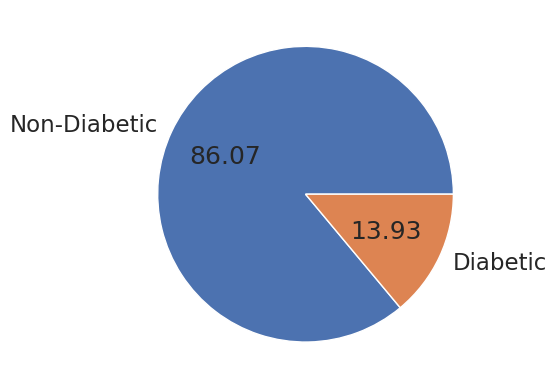

In [456]:
# Obtain value counts of patients with diabetes
labels=["Non-Diabetic","Diabetic"]
plt.pie(df["Diabetes_binary"].value_counts(), labels =labels ,autopct='%.02f');

In [457]:
df['Diabetes_binary_str']= df["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

df['Diabetes_binary_str'].value_counts()

Diabetes_binary_str
Non-Diabetic    218334
Diabetic         35346
Name: count, dtype: int64

* 86.07% (218,334) of the patients do not have diabetes
* 13.93% (35,346) of the patients have diabetes

### Upcoming Variable Evaluations
A. HighBP

B. HighChol

C. BMI

D. GenHealth

E. PhysHlth

F. DiffWalk

### A.) HighBP vs. Diabetes_binary

In [458]:
# Create a variable that turns highBP into a string with labels for bar chart readability later
df["HighBP_str"]= df["HighBP"].replace({0:"No",1:"Yes"})

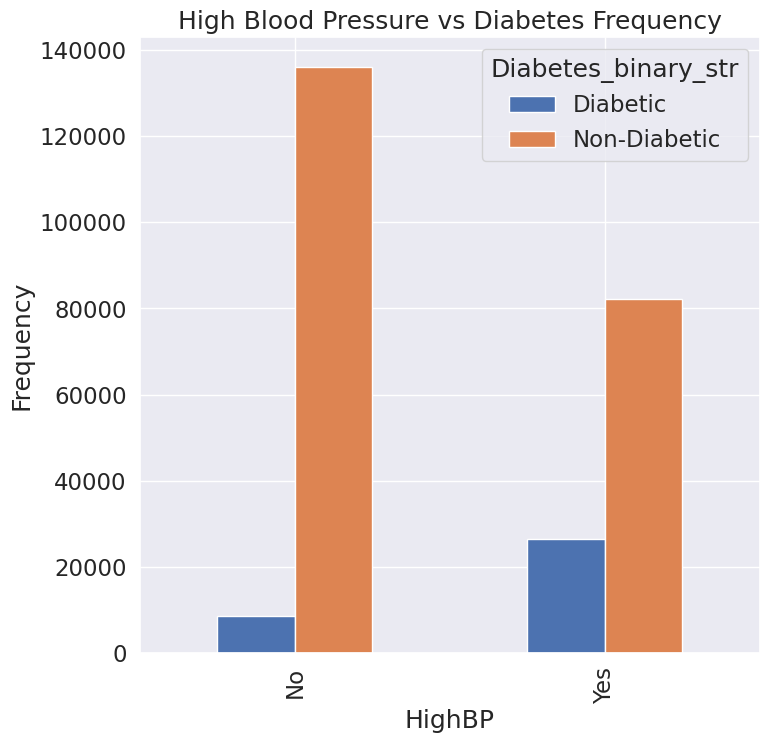

In [459]:
# Checking the relation with HighBP and Diabetes_binary
pd.crosstab(df.HighBP_str,df.Diabetes_binary_str).plot(kind="bar",figsize=(8,8))

plt.title('High Blood Pressure vs Diabetes Frequency')
plt.xlabel('HighBP')
plt.ylabel('Frequency')
plt.show()

In the above barchart, we see a drastic jump in diabetes frequency when patients say that they have high blood pressure. Let's investigate this further...

In [460]:
# Obtain percentages for the relationship between high BP and diabetes
(df.groupby("Diabetes_binary_str")["HighBP_str"].value_counts()/df.groupby("Diabetes_binary_str")["HighBP_str"].count()).round(4)*100

Diabetes_binary_str  HighBP_str
Diabetic             Yes           75.27
                     No            24.73
Non-Diabetic         No            62.34
                     Yes           37.66
dtype: float64

### B.) HighChol vs. Diabetes_binary
repeat the previous steps for cholesterol

In [461]:
df['HighChol_str']=df['HighChol'].replace({0:"No",1:"Yes"})

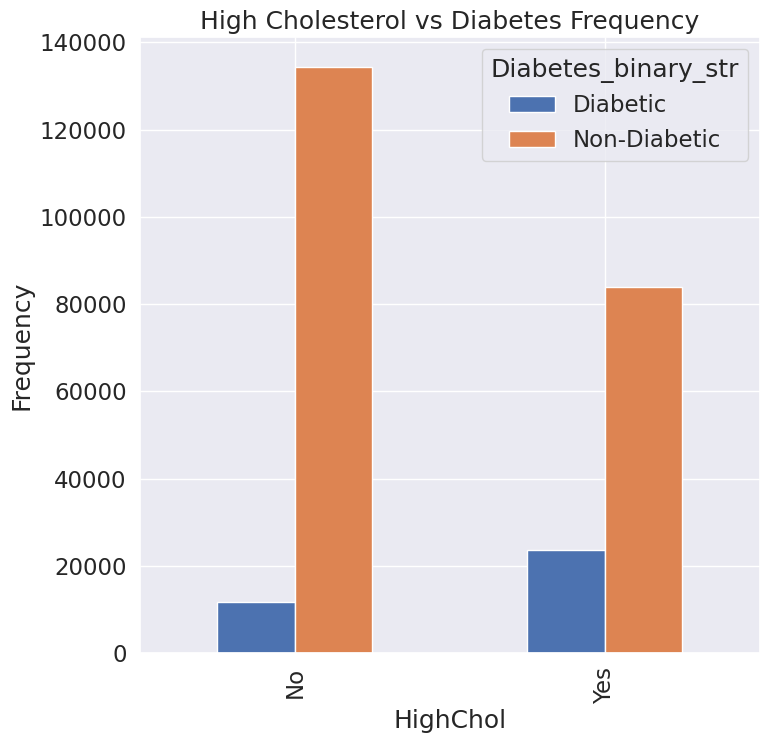

In [462]:
pd.crosstab(df.HighChol_str,df.Diabetes_binary_str).plot(kind='bar', figsize=(8,8))

plt.title('High Cholesterol vs Diabetes Frequency')
plt.xlabel('HighChol')
plt.ylabel('Frequency')
plt.show()

In [463]:
# Obtain percentages
(df.groupby('Diabetes_binary_str')['HighBP_str'].value_counts()/df.groupby('Diabetes_binary_str')['HighChol_str'].count()).round(4)*100

Diabetes_binary_str  HighBP_str
Diabetic             Yes           75.27
                     No            24.73
Non-Diabetic         No            62.34
                     Yes           37.66
dtype: float64

In [464]:
# Checking the correlation of HighBP and HighChol together against Diabetes_binary
(df.groupby(["HighBP_str", "HighChol_str"])["Diabetes_binary_str"].value_counts()/df.groupby(["HighBP_str" , "HighChol_str"])["Diabetes_binary"].count()).round(4)*100

HighBP_str  HighChol_str  Diabetes_binary_str
No          No            Non-Diabetic           95.81
                          Diabetic                4.19
            Yes           Non-Diabetic           89.58
                          Diabetic               10.42
Yes         No            Non-Diabetic           83.27
                          Diabetic               16.73
            Yes           Non-Diabetic           70.29
                          Diabetic               29.71
dtype: float64

### Correlation with Diabetes (diabetes_binary_str = yes)
HighBP(no) + HighChol(yes) > HighBP(yes) + HighChol(no)

The correlation between high blood pressure is stronger than the correlation between high cholesterol and diabetes
* HighBP(no) + HighChol(yes) = Diabetic 10.42%
* HighBP(yes) + HighChol(no) = Diabetic 16.73%

HighBP and Cholesterol = Has Diabetes
* High BP(yes) + HighChol(yes) = Diabetic 29.71%
* Having both HighBP and HighChol increases the risk of diabetes

### C.) BMI vs Diabetes_binary

(15.0, 60.0)

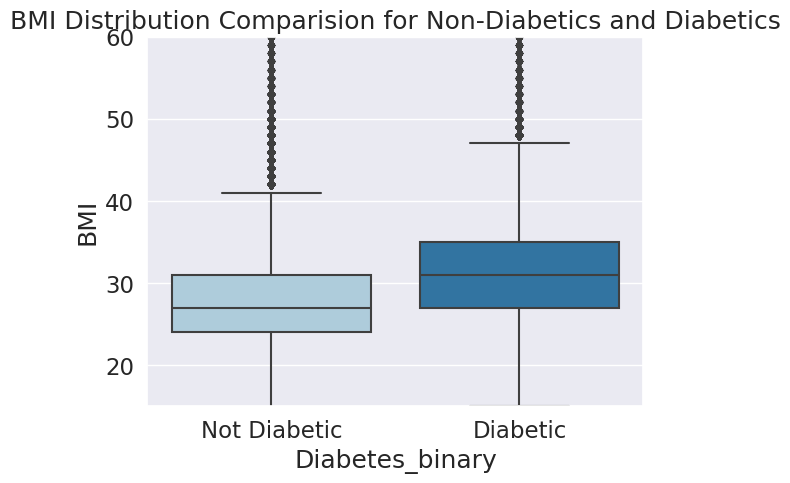

In [465]:
# Check the distribution and outlier positioning in BMI
ax = sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Paired')
ax.set(title = 'BMI Distribution Comparision for Non-Diabetics and Diabetics')
ax.set_xticklabels(['Not Diabetic', 'Diabetic'])
plt.ylim(15, 60)

Non Diabetics Have:
* a lower BMI range
* a lower mean BMI
* more outliers
* a slightly more right skewed distribution

In [466]:
# Obtain descriptive statistics for BMI for diabetic and non-diabetic
df.groupby('Diabetes_binary_str')['BMI'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary_str,,,,,,,,
Diabetic,35346.0,32.0,7.0,13.0,27.0,31.0,35.0,98.0
Non-Diabetic,218334.0,28.0,6.0,12.0,24.0,27.0,31.0,98.0


Observe that the mean BMI of diabetics is higher than the mean BMI of non-diabetics.

### D.) GenHlth vs Diabetes_binary

In [467]:
#Divide dataset into two - diabetes and non_diabetes
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]
df_no_genhlth = df_no['GenHlth']
df_yes_genhlth = df_yes['GenHlth']

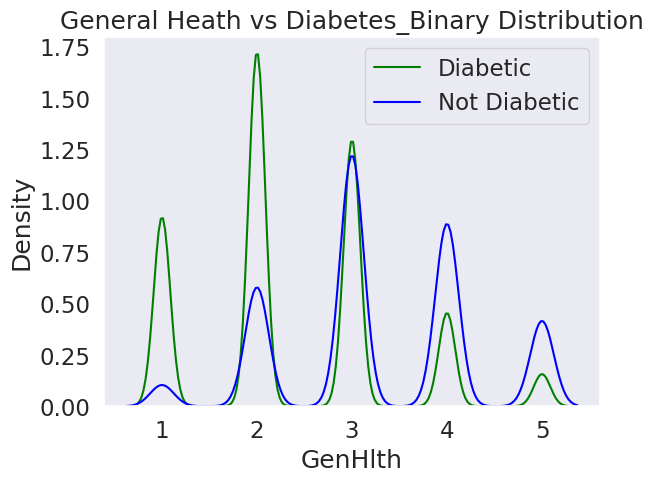

In [468]:
sns.kdeplot(df_no_genhlth,color='green')
sns.kdeplot(df_yes_genhlth,color='blue')
plt.grid()
plt.title('General Heath vs Diabetes_Binary Distribution')
plt.legend(['Diabetic', 'Not Diabetic'])

### E.) Physical Health vs Diabetes_binary

In [469]:
df_no_physhlth = df_no['PhysHlth']
df_yes_physhlth = df_yes['PhysHlth']

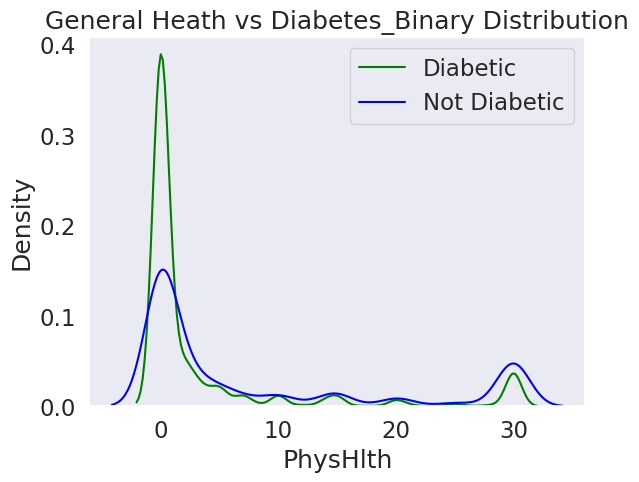

In [470]:
sns.kdeplot(df_no_physhlth,color='green')
sns.kdeplot(df_yes_physhlth,color='blue')
plt.grid()
plt.title('General Heath vs Diabetes_Binary Distribution')
plt.legend(['Diabetic', 'Not Diabetic'])

The distributions of the physical health of non-diabetics and diabetics closely matches.

### F.) Difficulty Walking vs Diabetes_binary

In [471]:
df["DiffWalk_str"]= df["DiffWalk"].replace({0:"No",1:"Yes"})

In [472]:
(df.groupby("Diabetes_binary_str")["DiffWalk_str"].value_counts()/df.groupby("Diabetes_binary_str")["DiffWalk_str"].count()).round(4)*100

Diabetes_binary_str  DiffWalk_str
Diabetic             No              62.88
                     Yes             37.12
Non-Diabetic         No              86.46
                     Yes             13.54
dtype: float64

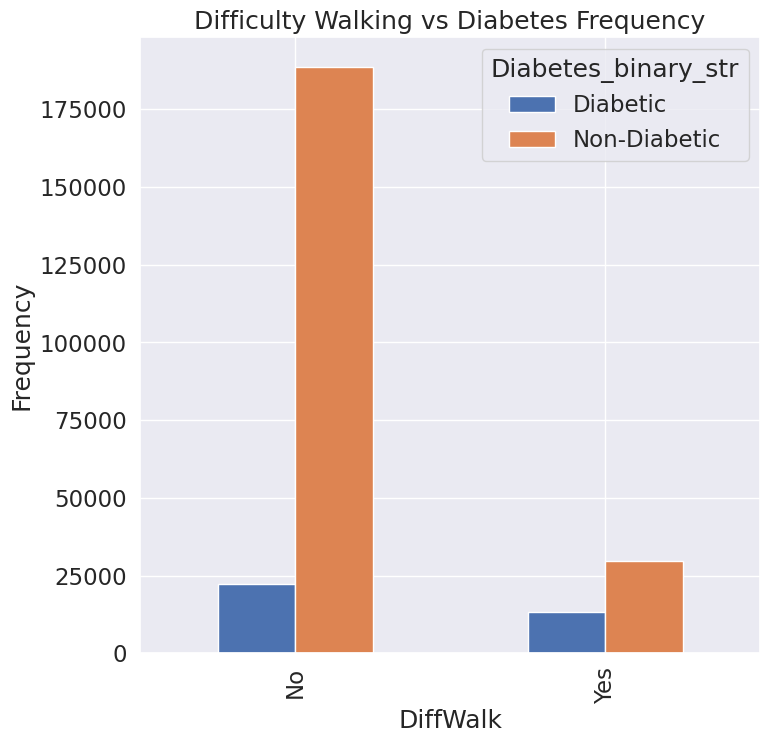

In [473]:
pd.crosstab(df.DiffWalk_str,df.Diabetes_binary_str).plot(kind='bar', figsize=(8,8))

plt.title('Difficulty Walking vs Diabetes Frequency')
plt.xlabel('DiffWalk')
plt.ylabel('Frequency')
plt.show()

***

***

# 3. Hypothesis Testing
A Chi-Squared Test will be conducted to determine the association between diabetics and non-diabetics (using Diabetes_binary) vs HighChol and HighBP

A ttest will be conducted to determine the association between

Chi Squared test for independence
-t tests cannot compare categorical data
-determines whether an two categorial variables are associated with each other

### A.) High Blood Pressure (HighBP) and Diabetes (Diabetes_binary)

H0: Diabetes_binary and HighBP are independent, and are not associated with each other

H1: Diabetes_binary and HighBP variables are not independent, and are associated with each other

In [474]:
# Prepare table
contingency= pd.crosstab(df.Diabetes_binary_str, df.HighBP_str)
contingency

HighBP_str,No,Yes
Diabetes_binary_str,,
Diabetic,8742,26604
Non-Diabetic,136109,82225


In [475]:
# Conduct chi-squared test
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency)
if (p_value_3 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


### B.) High Cholestorol (HighChol) and Diabetes (Diabetes_binary)

H0: Diabetes_binary and HighChol are independent, and are not associated with each other

H1: Diabetes_binary and HighChol variables are not independent, and are associated with each other

In [476]:
# Prepare table
contingency= pd.crosstab(df.Diabetes_binary_str, df.HighChol_str)
contingency

HighChol_str,No,Yes
Diabetes_binary_str,,
Diabetic,11660,23686
Non-Diabetic,134429,83905


In [477]:
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency)
if (p_value_3 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


### C.) Body Mass Index (BMI) and Diabetes (Diabetes_binary)

Conduct a two sample ttest since to compare whether two sample means are equal to each other
* H0: There is no significant difference between Diabetes_binary and BMI
* H1: There is a significant difference between Diabetes_binary and BMI

Further reasoning:
* the sample size is large
* the population std is known, but is difficult to pinpoint with large amounts of data. Consequently, ttests are more commonly used in practice ??

In [478]:
# Create variables before comparing BMI averages 
df_no_bmi = df_no['BMI']
df_yes_bmi = df_yes['BMI']

In [479]:
# Compare BMI averages across diabetics and non-diabetics
print('Average BMI for diabetics is {} and not diabetic is {} '.format(df_yes_bmi.mean().round(2),df_no_bmi.mean().round(2)))

Average BMI for diabetics is 31.94 and not diabetic is 27.81 


In [480]:
# Conduct a two sample ttest 
ttest,p_value_1  = stats.ttest_ind(df_yes_bmi, df_no_bmi)
if p_value_1 < 0.05:   
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


### D.) General Health (GenHlth) and Diabetes (Diabetes_binary)

Conduct a two sample ttest since to compare whether two sample means are equal to each other

* H0: There is no significant difference between Diabetes_binary and GenHlth
* H1: There is a significant difference between Diabetes_binary and GenHlth

In [481]:
# Create variables before comparing GenHlth averages 
df_no_genhlth = df_no['GenHlth']
df_yes_genhlth = df_yes['GenHlth']

In [482]:
# Compare GenHlth averages across diabetics and non-diabetics
print('Average GenHlth self-rating for diabetics is {} and not diabetic is {} '.format(df_yes_genhlth.mean().round(2),df_no_genhlth.mean().round(2)))

Average GenHlth self-rating for diabetics is 3.29 and not diabetic is 2.39 


In [483]:
# Conduct a two sample ttest 
ttest,p_value_1  = stats.ttest_ind(df_yes_genhlth, df_no_genhlth)
if p_value_1 < 0.05:   
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


### E.) Physical Health (PhysHlth) and Diabetes (Diabetes_binary)

Conduct a two sample ttest since to compare whether two sample means are equal to each other

* H0: There is no significant difference between Diabetes_binary and PhysHlth
* H1: There is a significant difference between Diabetes_binary and PhysHlth

In [484]:
# Create variables before comparing PhysHlth averages 
df_no_physhlth = df_no['PhysHlth']
df_yes_physhlth = df_yes['PhysHlth']

In [485]:
# Compare GenHlth averages across diabetics and non-diabetics
print('Average PhysHlth self-rating for diabetics is {} and not diabetic is {} '.format(df_yes_physhlth.mean().round(2),df_no_physhlth.mean().round(2)))

Average PhysHlth self-rating for diabetics is 7.95 and not diabetic is 3.64 


In [486]:
# Conduct a two sample ttest 
ttest,p_value_1  = stats.ttest_ind(df_yes_physhlth, df_no_physhlth)
if p_value_1 < 0.05:   
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


### F.) Difficulty Walking (DiffWalk) and Diabetes (Diabetes_binary)

H0: Diabetes_binary and DiffWalk are independent, and are not associated with each other

H1: Diabetes_binary and DiffWalk are not independent, and are associated with each other

In [487]:
# Prepare table
contingency= pd.crosstab(df.Diabetes_binary_str, df.DiffWalk_str)
contingency

DiffWalk_str,No,Yes
Diabetes_binary_str,,
Diabetic,22225,13121
Non-Diabetic,188780,29554


In [488]:
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency)
if (p_value_3 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


***

***

# 4.) Feature Engineering
Based on the previous EDA and statistical analysis, we have a good recollection and analysis of important features for stakeholders (and my own practice). 

However, there is a way to automate selection using ANOVA

In [489]:
# drop str variables (categorial variables) to prevent errors in ANOVA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Diabetes_binary       253680 non-null  int64 
 1   HighBP                253680 non-null  int64 
 2   HighChol              253680 non-null  int64 
 3   CholCheck             253680 non-null  int64 
 4   BMI                   253680 non-null  int64 
 5   Smoker                253680 non-null  int64 
 6   Stroke                253680 non-null  int64 
 7   HeartDiseaseorAttack  253680 non-null  int64 
 8   PhysActivity          253680 non-null  int64 
 9   Fruits                253680 non-null  int64 
 10  Veggies               253680 non-null  int64 
 11  HvyAlcoholConsump     253680 non-null  int64 
 12  AnyHealthcare         253680 non-null  int64 
 13  NoDocbcCost           253680 non-null  int64 
 14  GenHlth               253680 non-null  int64 
 15  MentHlth         

In [490]:
# drop str variables (categorial variables) to prevent errors in ANOVA
columns_to_drop = ['Diabetes_binary_str','HighBP_str','HighChol_str','DiffWalk_str']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [570]:
# Split the columns and designate Diabetes_binary as Y
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [576]:
# define feature selection formula
fs = SelectKBest(score_func=f_classif,k=13)

In [577]:
# apply feature selection
X_selected = fs.fit_transform(X,Y)
print(X_selected.shape)

(253680, 13)


In [578]:
pd.DataFrame(X_selected).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,1.0,40.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0,4.0,8.0
3,1.0,0.0,27.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,24.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,11.0,5.0,4.0


In [579]:
# Conduct a chi2 to utilize SelectKBest to extract the top 10 features
BestFeatures = SelectKBest(score_func=chi2, k=13)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)
f_Scores.columns = ['Feature','Score']

n=f_Scores.shape[0]

print(n)
f_Scores.sort_values(by=['Score']).iloc[n:7:-1]

21


,Feature,Score
15,PhysHlth,133424.406534
14,MentHlth,21029.632228
3,BMI,18355.166400
16,DiffWalk,10059.506391
0,HighBP,10029.013935
13,GenHlth,9938.507776
18,Age,9276.141199
6,HeartDiseaseorAttack,7221.975378
1,HighChol,5859.710582
20,Income,4829.816361


***

***

# 5.) Pre-Processing and Hyperparameter Tuning

### Since we have a few features with different ranges, we will perform normalization. 

#### However, this will be done later in the model construction since clustering algorithms like Kmeans and KNN are negatively affected by standardization.

* KNN: very affected by standardization since distance between entities is calculated
* Random Forests & Decision Trees: unneccessary to use since the structure of decisions is not changed
* Regression: standardization improves stability and may speed up the training process
* XGBoost: resilient to feature scaling, without normalization larger features might dominate.

Moving Forward: Begin with Nmeans, KNN, Random Forest and Decision Trees before normalization

In [580]:
# Choose columns for model based on correlation matrix 
df_model = df[['Diabetes_binary', 'HighBP','HighChol', 'BMI', 'GenHlth', 
               'DiffWalk', 'Age', 'HeartDiseaseorAttack', 'PhysHlth','MentHlth','Stroke','PhysActivity','HvyAlcoholConsump']]

In [581]:
# Train test split
x = df_model.drop('Diabetes_binary', axis=1)
y = df_model['Diabetes_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [582]:
# Drop unnecessary columns
unused_colomns = ['Fruits', 'Veggies', 'Sex', 'CholCheck', 'AnyHealthcare','Education','Smoker','NoDocbcCost']
df.drop(columns=unused_colomns, axis=1,inplace=True)

In [583]:
# Confirm column drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Stroke                253680 non-null  float64
 5   HeartDiseaseorAttack  253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   HvyAlcoholConsump     253680 non-null  float64
 8   GenHlth               253680 non-null  float64
 9   MentHlth              253680 non-null  float64
 10  PhysHlth              253680 non-null  float64
 11  DiffWalk              253680 non-null  float64
 12  Age                   253680 non-null  float64
 13  Income                253680 non-null  float64
dtypes: float64(14)
memory usage: 27.1 MB


In [584]:
# split data
X=df.drop('Diabetes_binary',axis=1)
Y=df['Diabetes_binary']

In [585]:
Y.value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

 ! There is a large class imbalance in the dataset

#### Nearmiss use reasoning:
* Prevent increased CPU usage
* Enough samples are present
* Low risk of overfitting

In [587]:
# Alter class imbalance by randomly eliminating majority class samples
nm = NearMiss(version = 1,n_neighbors=13)
x_sm,y_sm=nm.fit_resample(X,Y)

In [588]:
# Confirm nearmiss success
y_sm.shape , x_sm.shape

((70692,), (70692, 13))

In [589]:
# Confirm nearmiss success
y_sm.value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [590]:
# Split training and testing data
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

In [591]:
# Verify the number of samples in the partitioned data
for x in [X_train, X_test, Y_train, Y_test]:
    print(len(x))

49484
21208
49484
21208


#### Begin hyperparameter tuning with GridSearchCV

In [626]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy','log_loss'],'min_samples_leaf':[3,5,8],'max_depth':[5,8,10]}]), 
               (RandomForestClassifier(),[{'n_estimators':[50,100,200],'max_depth':[5,8,10],'criterion':['gini','entropy']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[3,5,10],'algorithm':['auto','ball_tree','kd_tree','brute']}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.10, 0.20,0.50], 'eval_metric': ['error']}])]

In [627]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, Y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 87.27%
Best Parameters :  {'C': 0.75}

----------------

DecisionTreeClassifier():
Best Accuracy : 88.29%
Best Parameters :  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8}

----------------

RandomForestClassifier():
Best Accuracy : 88.91%
Best Parameters :  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

----------------

KNeighborsClassifier():
Best Accuracy : 85.58%
Best Parameters :  {'algorithm': 'auto', 'n_neighbors': 5}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,


# 6.) Model Construction
In this section, I will be continuting my previous work by building off the previous EDA and Statistical testing to build 5 machine learning models:
* K Nearest Neighbors
* Decision Tree
* Random Forests
* Logistic Regression
* XGBoost

As stated previously, models negatively affected by normalization will be built first.
* KNN, Decision Tree, Random Forests

## A.) K Nearest Neighbors (KNN)

In [630]:
# Fit the model on the training data
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=5)
knn.fit(X_train , Y_train)

KNeighborsClassifier()

In [631]:
# make predictions on test set
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.8941
Test set score: 0.8636


In [632]:
# Check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.13641078838174273
Root Mean Squared Error : 0.36933831155424796


In [633]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87     10601
         1.0       0.93      0.79      0.85     10607

    accuracy                           0.86     21208
   macro avg       0.87      0.86      0.86     21208
weighted avg       0.87      0.86      0.86     21208



Summary:
* precision: what proportion of "has diabetes" diagnoses were correct (true positives/all true and false positives)
* recall: proportion of actual diabetes positive cases that were identified correctly (TP/TP+FN)
* f1: combination of precision and recall

However, since we rebalanced our classes these will not be weighed more favorabily

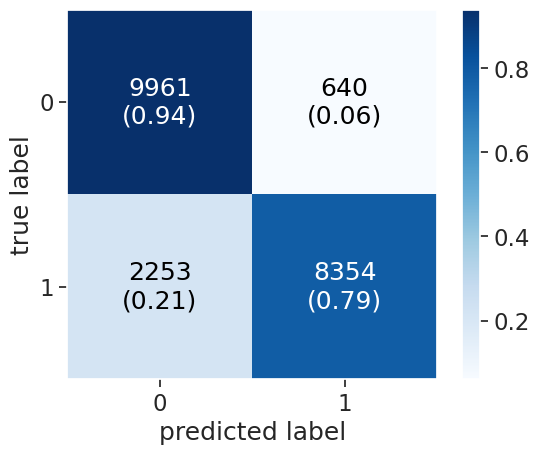

In [634]:
# Calculate and plot the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

KNeighbors did not provide suitable outcomes, as this is the highest type 2 error yet.

Results Summary:
* 94% of the predicted positive values were correct
* 79% of the predicted negative values were correct
* there is a 6% chance of making a type 1 error (false positive)
* there is a 21% chance of making a type 2 error (false negative)

## B.) Decision Tree

In [635]:
# Fit the model on the training data
dt = DecisionTreeClassifier(criterion= 'gini',max_depth=10,min_samples_leaf=8)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=8)

In [636]:
# Make predictions on test data
y_pred=dt.predict(X_test)
print('Training set score: {:.4f}'.format(dt.score(X_train,Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_train,Y_train)))

Training set score: 0.8864
Test set score: 0.8864


In [637]:
# Check MSE and RSME
mse=mean_squared_error(Y_test,y_pred)
print('Mean Squared Error : '+str(mse))

rmse=math.sqrt(mse)
print('Mean Squared Error :'+str(rmse))

Mean Squared Error : 0.12103923047906451
Mean Squared Error :0.3479069278974831


In [638]:
# Create Decision Tree Classification Report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     10601
         1.0       0.95      0.80      0.87     10607

    accuracy                           0.88     21208
   macro avg       0.89      0.88      0.88     21208
weighted avg       0.89      0.88      0.88     21208



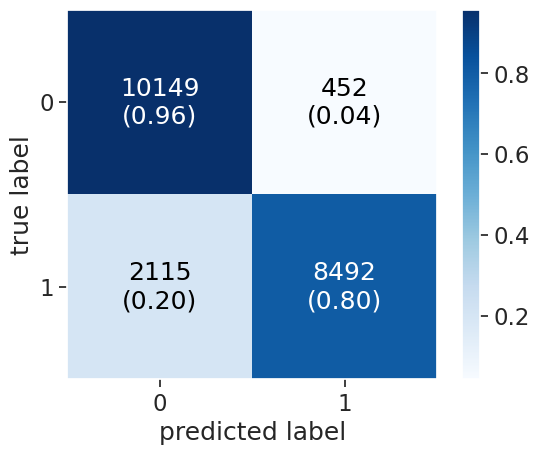

In [639]:
# Calculate and plot the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

Confusion matrix=how many in each class are correct vs incorrect

Results Summary:
* 96% of the predicted positive values were correct
* 80% of the predicted negative values were correct
* there is a 4% chance of making a type 1 error (false positive)
* there is a 20% chance of making a type 2 error (false negative)

As I changed the max depth, I noticed that as the max_depth decreases, the chance of making a type 2 error (FN) changes. A max depth of 10 had the lowest probability of a type 2 error.

## C.) Random Forests

In [640]:
# Fit the model on the training data
rf = RandomForestClassifier(max_depth=10, criterion='gini', n_estimators =100, min_samples_split=10, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [641]:
# Make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8906
Test set score: 0.8838


In [642]:
# Check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.11622972463221426
Root Mean Squared Error : 0.34092480788615875


In [643]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89     10601
         1.0       0.95      0.81      0.87     10607

    accuracy                           0.88     21208
   macro avg       0.89      0.88      0.88     21208
weighted avg       0.89      0.88      0.88     21208



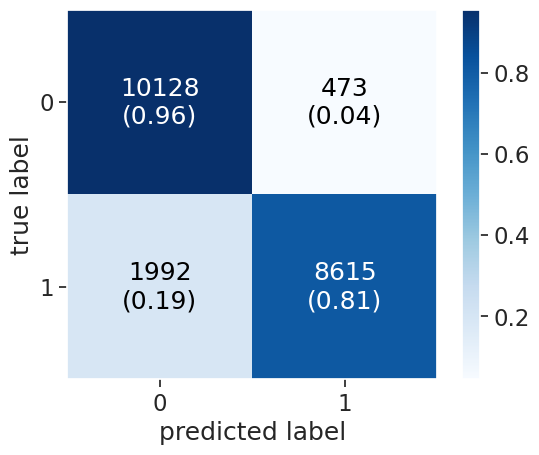

In [644]:
# Calculate and plot the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True,colorbar=True)
plt.show()

Lowest Type 11 error probability so far

Results Summary:
* 96% of the predicted positive values were correct
* 81% of the predicted negative values were correct
* there is a 4% chance of making a type 1 error (false positive)
* there is a 19% chance of making a type 2 error (false negative)

## D.) Logistic Regression

In [607]:
# First, perform normalization
means= np.mean(X_train, axis=0)
stds= np.std(X_train, axis=0)

X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [608]:
# Fit the model on the training data
lg=LogisticRegression(C=0.75, random_state=42)
lg.fit(X_train,Y_train)

LogisticRegression(C=0.75, random_state=42)

In [609]:
# make initial predictions on test data and make the result 4 decimal places
y_pred=lg.predict(X_test)
print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8740
Test set score: 0.8700


In [610]:
# check MSE & RMSE
mse=mean_squared_error(Y_test,y_pred)
print('Mean Squared Error : '+str(mse))

rmse=math.sqrt(mse)
print('Root Mean Squared Error : '+str(rmse))

Mean Squared Error : 0.12995096190116937
Root Mean Squared Error : 0.36048711752456475


Mean squared error=how close the data points are to the regression line is to the data points

In [611]:
matrix = classification_report(Y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     10601
         1.0       0.92      0.81      0.86     10607

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208



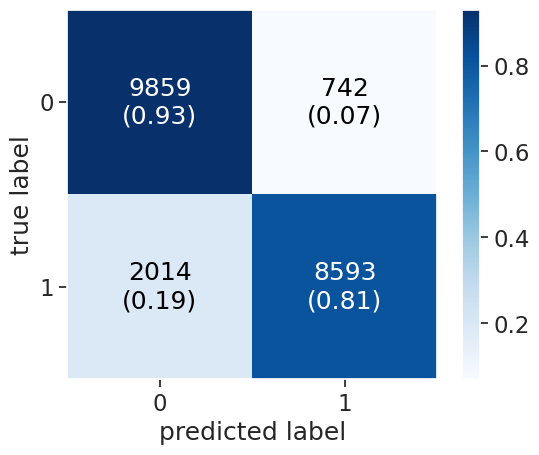

In [612]:
# calculating the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True, colorbar=True)
plt.show()

Confusion matrix=how many in each class are correct vs incorrect

Results Summary:
* 93% of the predicted positive values were correct
* 81% of the predicted negative values were correct
* there is a 7% chance of making a type 1 error (false positive)
* there is a 19% chance of making a type 2 error (false negative)

Both types of errors are alarming. The type 2 error risk is high, which means patients may not be diagnosed with diabetes when they do have it. These errors need to be reduced.

## E.) XG Boost

In [651]:
# Fit training data to model
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.2, min_child_weight=1)
xg.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [652]:
# Run predictions
y_pred=xg.predict(X_test)

print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

Training set score: 0.9041
Test set score: 0.8952


In [653]:
# Check Error: MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.10477178423236515
Root Mean Squared Error : 0.32368469879245937


In [654]:
# Print classification Report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     10601
         1.0       0.95      0.83      0.89     10607

    accuracy                           0.90     21208
   macro avg       0.90      0.90      0.89     21208
weighted avg       0.90      0.90      0.89     21208



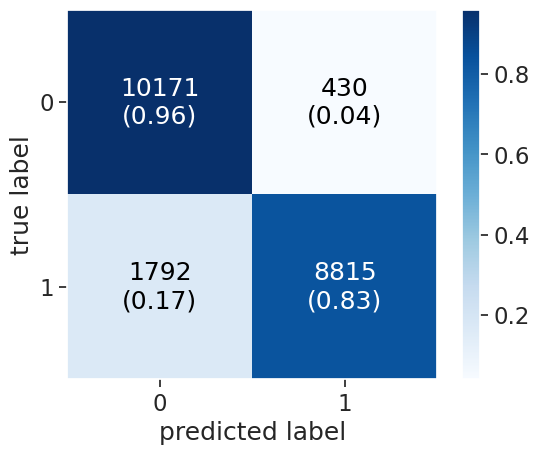

In [655]:
# Calculate and plot the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

Results Summary:
* 96% of the predicted positive values were correct
* 83% of the predicted negative values were correct
* there is a 4% chance of making a type 1 error (false positive)
* there is a 17% chance of making a type 2 error (false negative)

## Comparing Model Accuracy
In all of these models, it is apparent that the risk of a type 2 error is high. This is especially concerning for medical diagnosis, as the risk of a diagnosis coming back negative when it is actually positive can be life changing. 

Instead of choosing the model with the best accuracy, we should consider accuracy and Type 2 error.

#### If you have any comments/revisions please comment below! I'm consistently working to teach myself machine learning concepts, so any feedback helps.